In [1]:
#import packages we need 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib as mpl
import pypsr as pyps 
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
#download and save the data 
import requests
import pandas as pd
data_url='https://people.rit.edu/nxmsma/courses/webM689S23/data/Laser-SF.dat'
r = requests.get(data_url)
open('Laser-SF.dat', 'wb').write(r.content)

laser_ts = np.loadtxt('Laser-SF.dat') 

In [3]:
#copy first 2000 points 
laser_ts_a=laser_ts[0:2000]

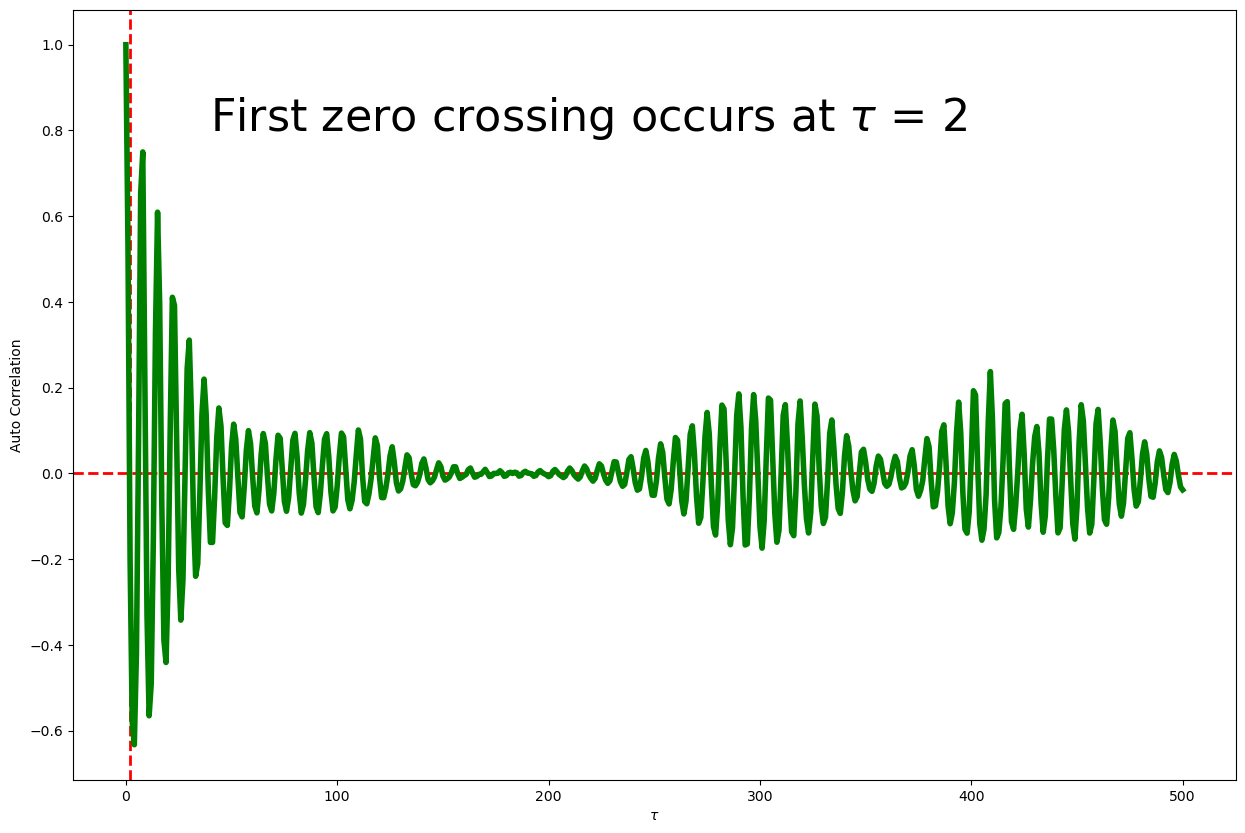

In [4]:
# Determine Delay

lag_acf=sm.tsa.stattools.acf(laser_ts_a, nlags=500)

m_tau_a=np.where(lag_acf<=0)[0][0]



fig = plt.figure(figsize=(15,10))

plt.axvline(x=m_tau_a, color='r', linestyle='--',lw=2)
plt.axhline(y=0.0, color='r', linestyle='--',lw=2)


plt.plot(lag_acf[:],ls = '-',lw=4,color='g');

plt.text(40,0.8,r'First zero crossing occurs at $\tau$ = %i' % (m_tau_a),fontsize=32)
plt.xlabel(r'$\tau$') 
plt.ylabel('Auto Correlation'); 

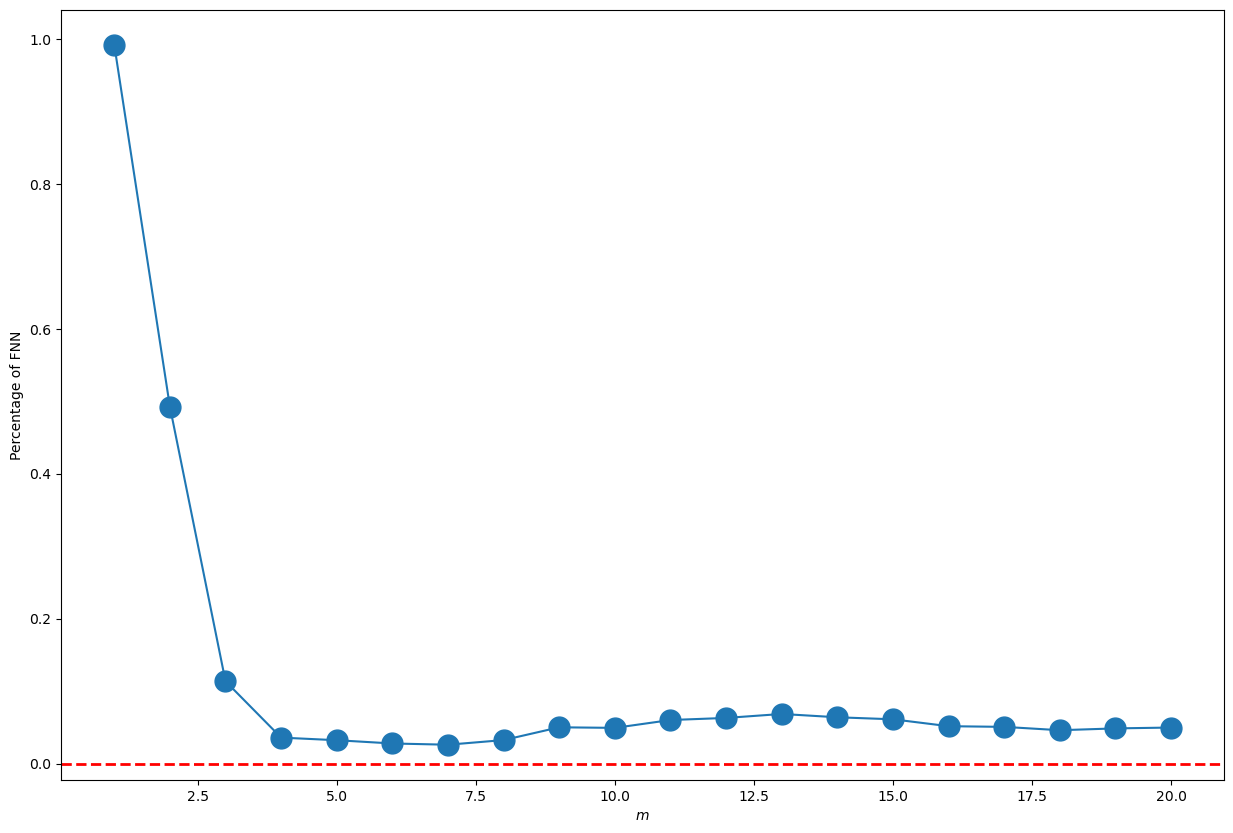

In [5]:
#Determine Embedding Dimension

Phasdims=pyps.global_false_nearest_neighbors(laser_ts_a,32, min_dims=1, max_dims=20)  

fig = plt.figure(figsize=(15,10))
plt.plot(Phasdims[0], Phasdims[1],marker='o',ms=15)
plt.axhline(y=0, color='r', linestyle='--',lw=2)
plt.ylabel('Percentage of FNN') 
plt.xlabel(r'$m$'); 

In [6]:
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
from pyrqa.analysis_type import Classic
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.computation import RPComputation

In [7]:
time_series = TimeSeries(laser_ts_a,
                         embedding_dimension=5,
                         time_delay=2)
settings = Settings(time_series,
                    analysis_type=Classic,
                    neighbourhood=FixedRadius(37.),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,verbose=False)
laser_rqa = computation.run();
print(laser_rqa.recurrence_rate)

0.04963831228528572


In [8]:
computation = RPComputation.create(settings)
result = computation.run()
rmat_Laser=result.recurrence_matrix

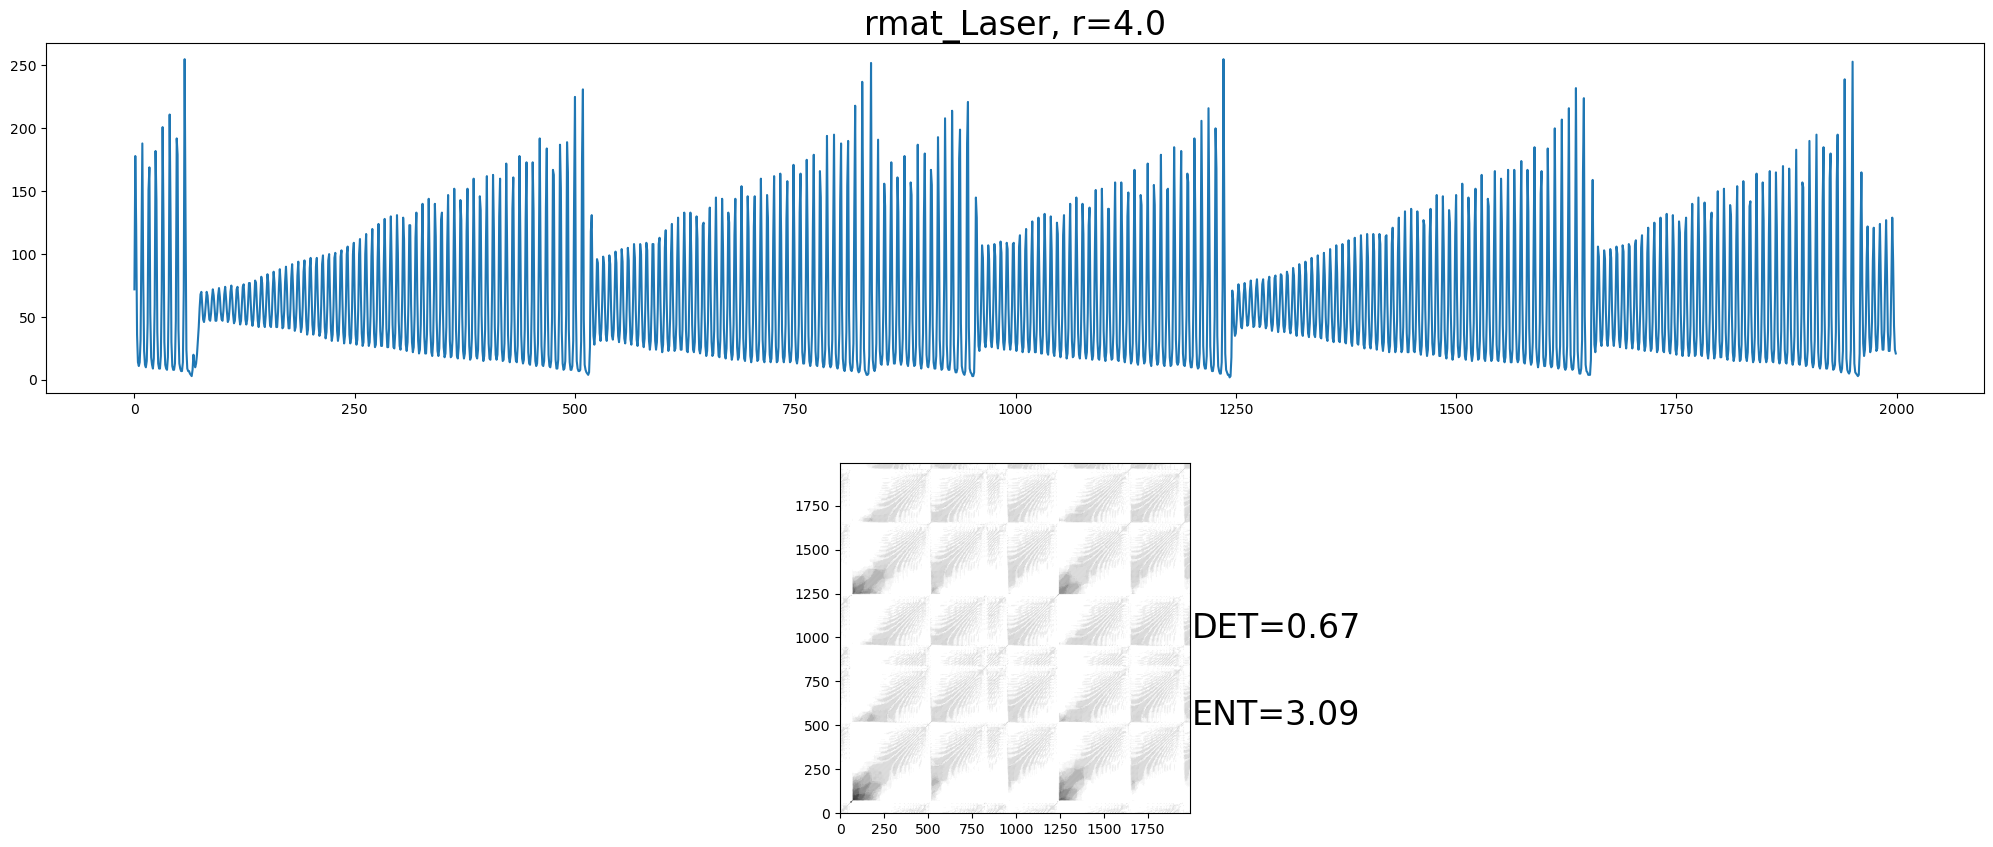

In [12]:
plt.figure(figsize=(25,10))

plt.subplot(2,1,1)
plt.plot(laser_ts_a);
plt.title('rmat_Laser, r=4.0',fontsize=24)


plt.subplot(2,1,2)
plt.imshow(rmat_Laser,cmap='binary',origin="lower")


laser_rqa.min_diagonal_line_length = 2
plt.text(2000,1000,"DET=%2.2f" %(laser_rqa.determinism),fontsize=24);
plt.text(2000,500,"ENT=%2.2f" %(laser_rqa.entropy_diagonal_lines),fontsize=24);